## Python Data Analysis Project: Average Income of Taxi Drivers in New York City.

### Import libraries

In [204]:
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Read parquet file using pandas

In [205]:
parquet_file = 'yellow_tripdata_2019-01.parquet'
df = pd.read_parquet(parquet_file, engine='auto')

In [206]:
df = pd.read_parquet(parquet_file, engine='auto')

In [207]:
pd.options.display.float_format = "{:.2f}".format

In [208]:
print(df.shape)
df.head()

(7696617, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.00,1.50,1.00,N,151,239,1,7.00,0.50,0.50,1.65,0.00,0.30,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.00,2.60,1.00,N,239,246,1,14.00,0.50,0.50,1.00,0.00,0.30,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.00,0.00,1.00,N,236,236,1,4.50,0.50,0.50,0.00,0.00,0.30,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.00,0.00,1.00,N,193,193,2,3.50,0.50,0.50,0.00,0.00,0.30,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.00,0.00,2.00,N,193,193,2,52.00,0.00,0.50,0.00,0.00,0.30,55.55,NaN,None


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7696617 entries, 0 to 7696616
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [210]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7696617.00,7696617,7696617,7667945.00,7696617.00,7667945.00,7696617.00,7696617.00,7696617.00,7696617.00,7696617.00,7696617.00,7696617.00,7696617.00,7696617.00,7696617.00,2811730.00
mean,1.64,2019-01-17 00:56:26.319621,2019-01-17 01:12:59.384514,1.57,2.83,1.06,165.40,163.63,1.29,12.53,0.34,0.50,1.82,0.32,0.30,15.81,0.00
min,1.00,2001-02-02 14:55:07,2001-02-02 15:07:27,0.00,0.00,1.00,1.00,1.00,0.00,-362.00,-60.00,-0.50,-63.50,-70.00,-0.30,-362.80,0.00
25%,1.00,2019-01-09 17:39:43,2019-01-09 17:55:48,1.00,0.90,1.00,127.00,113.00,1.00,6.00,0.00,0.50,0.00,0.00,0.30,8.30,0.00
50%,2.00,2019-01-16 22:15:35,2019-01-16 22:30:08,1.00,1.53,1.00,162.00,162.00,1.00,9.00,0.00,0.50,1.40,0.00,0.30,11.30,0.00
75%,2.00,2019-01-24 19:12:20,2019-01-24 19:27:57,2.00,2.83,1.00,234.00,234.00,2.00,13.50,0.50,0.50,2.32,0.00,0.30,16.60,0.00
max,5.00,2088-01-24 00:25:39,2088-01-24 07:28:25,9.00,831.80,99.00,265.00,265.00,4.00,623259.86,535.38,60.80,787.25,3288.00,0.60,623261.66,2.50
std,0.54,NaN,NaN,1.22,3.77,0.68,66.44,70.41,0.48,261.59,0.53,0.05,2.50,2.03,0.02,261.81,0.01


## Checking for unique values in columns

In [211]:
unique_list = ['payment_type', 'RatecodeID', 'passenger_count']

for i in unique_list:
    print(i, ':', sorted(df[i].unique()))

payment_type : [0, 1, 2, 3, 4]
RatecodeID : [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 99.0, nan]
passenger_count : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, nan]


In [212]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [213]:
df = df[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime','passenger_count', 'trip_distance', 
         'RatecodeID','PULocationID', 'DOLocationID', 'payment_type',  'total_amount']]

In [214]:
def outlier_detection_boxplot(data_0, data_1, data_2):
    fig, axes = plt.subplots(1, 3, figsize=(15, 2))
    fig.suptitle('Boxplots for outlier detection')
    plt.xticks(fontsize=8)
    sns.boxplot(ax=axes[0], x=data_0)
    sns.boxplot(ax=axes[1], x=data_1)
    sns.boxplot(ax=axes[2], x=data_2)
    plt.show();

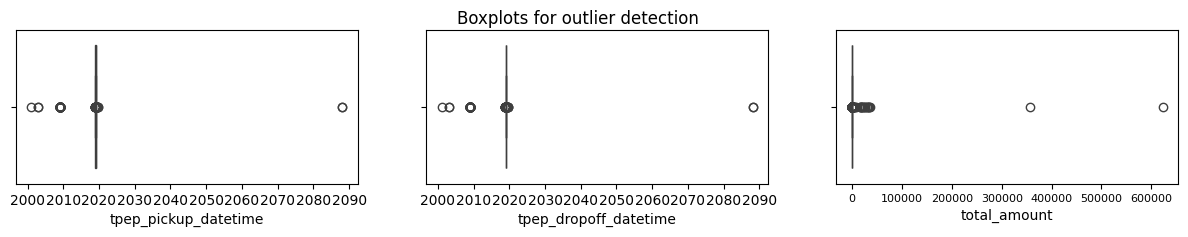

In [215]:
outlier_detection_boxplot(df['tpep_pickup_datetime'], df['tpep_dropoff_datetime'], df['total_amount'])

In [216]:
# Dataset contains several outliers
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,7696617.00,7696617,7696617,7667945.00,7696617.00,7667945.00,7696617.00,7696617.00,7696617.00,7696617.00
mean,1.64,2019-01-17 00:56:26.319621,2019-01-17 01:12:59.384514,1.57,2.83,1.06,165.40,163.63,1.29,15.81
min,1.00,2001-02-02 14:55:07,2001-02-02 15:07:27,0.00,0.00,1.00,1.00,1.00,0.00,-362.80
25%,1.00,2019-01-09 17:39:43,2019-01-09 17:55:48,1.00,0.90,1.00,127.00,113.00,1.00,8.30
50%,2.00,2019-01-16 22:15:35,2019-01-16 22:30:08,1.00,1.53,1.00,162.00,162.00,1.00,11.30
75%,2.00,2019-01-24 19:12:20,2019-01-24 19:27:57,2.00,2.83,1.00,234.00,234.00,2.00,16.60
max,5.00,2088-01-24 00:25:39,2088-01-24 07:28:25,9.00,831.80,99.00,265.00,265.00,4.00,623261.66
std,0.54,NaN,NaN,1.22,3.77,0.68,66.44,70.41,0.48,261.81


## Determine number of rows containing outliers

In [217]:
def outlier_limits(df, column):
    # Compute the 25th percentile value in data
    percentile25 = column.quantile(0.25)

    # Compute the 25th percentile value in data
    percentile25 = column.quantile(0.25)

    # Compute the 75th percentile value data
    percentile75 = column.quantile(0.75)

    # Compute the interquantile range in data
    iqr = percentile75 - percentile25

    # Define the upper limit and lower limit for non-outlier values in data
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print('lower limit:', lower_limit)
    print('upper limit:', upper_limit)

    # Identify subset of data containing outliers in data
    outliers = df[(column > upper_limit) | (column < lower_limit)]

    # Count how many rows in the data contain outliers in tpep_pickup_datetime
    print('Number of rows in the data containing outliers:' , len(outliers))

    return lower_limit, upper_limit


In [218]:
lower_limit, upper_limit = outlier_limits(df, df['tpep_pickup_datetime'])

lower limit: 2018-12-18 03:20:47.500000
upper limit: 2019-02-16 09:31:15.500000
Number of rows in the data containing outliers: 113


## Getting rid of outliers

In [219]:
df2 = df[(df['tpep_pickup_datetime'] >= lower_limit) & (df['tpep_pickup_datetime'] <= upper_limit)]

In [237]:
# Repeat the process of outlier detection for tpep_dropoff_datetime column
lower_limit, upper_limit = outlier_limits(df2, df2['tpep_dropoff_datetime'])

lower limit: 2018-12-18 04:27:46
upper limit: 2019-02-16 09:42:02
Number of rows in the data containing outliers: 0


In [238]:
# Outlier detection for total_amount
lower_limit, upper_limit = outlier_limits(df2, df2['total_amount'])

lower limit: -1.9450000000000003
upper limit: 24.575000000000003
Number of rows in the data containing outliers: 210351


In [239]:
# Repeat the process of outlier filtering for total_amount column
df2 = df2[(df2['total_amount'] >= lower_limit) & (df2['total_amount'] <= upper_limit)]

In [240]:
df2.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,6707439.00,6707439,6707439,6707356.00,6707439.00,6707356.00,6707439.00,6707439.00,6707439.00,6707439.00
mean,1.63,2019-01-17 01:59:49.827458,2019-01-17 02:13:22.612839,1.57,1.69,1.01,167.54,166.06,1.30,11.36
min,1.00,2018-12-21 13:48:30,2018-12-21 13:52:40,0.00,0.00,1.00,1.00,1.00,0.00,0.11
25%,1.00,2019-01-09 18:00:54,2019-01-09 18:13:21,1.00,0.87,1.00,116.00,114.00,1.00,7.80
50%,2.00,2019-01-16 22:21:02,2019-01-16 22:33:17,1.00,1.38,1.00,163.00,163.00,1.00,10.38
75%,2.00,2019-01-24 19:19:09,2019-01-24 19:31:46,2.00,2.20,1.00,234.00,234.00,2.00,14.12
max,5.00,2019-02-04 09:21:50,2019-02-04 09:30:58,9.00,831.80,99.00,265.00,265.00,4.00,24.57
std,0.54,NaN,NaN,1.22,1.26,0.52,67.13,69.33,0.47,4.53


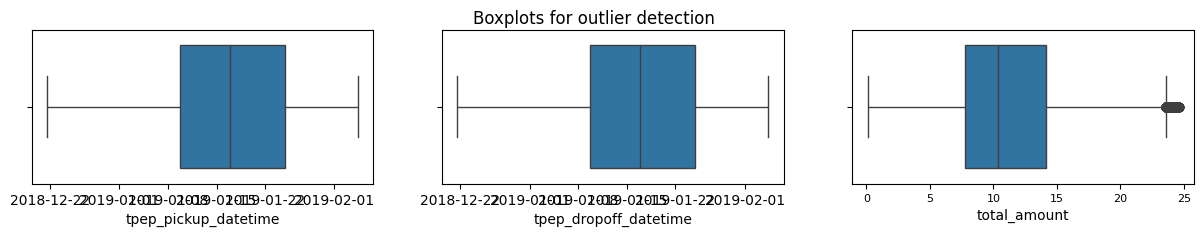

In [249]:
# Let's check for outliers
outlier_detection_boxplot(df2['tpep_pickup_datetime'], df2['tpep_dropoff_datetime'], df2['total_amount'])

There's still some outliers in the `total_amount` column

In [250]:
lower_limit, upper_limit = outlier_limits(df2, df2['total_amount'])

lower limit: -1.6799999999999988
upper limit: 23.599999999999998
Number of rows in the data containing outliers: 71246


In [251]:
# Get rid of ouliers
df2 = df2[(df2['total_amount'] >= lower_limit) & (df2['total_amount'] <= upper_limit)]

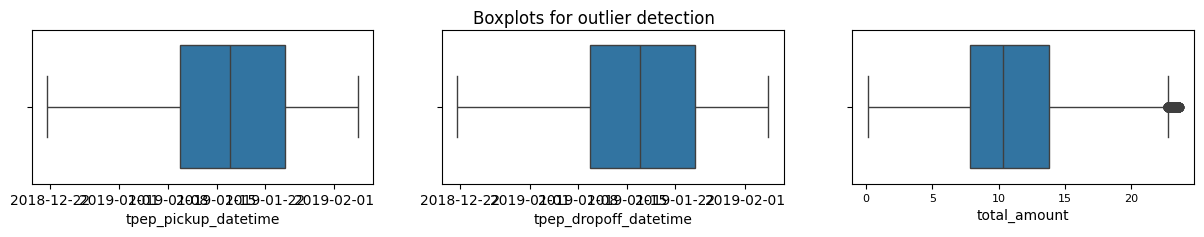

In [252]:
# Check for outliers with boxplots
outlier_detection_boxplot(df2['tpep_pickup_datetime'], df2['tpep_dropoff_datetime'], df2['total_amount'])

Outliers are still present in `total_amount` column, let's get some new upper and lower limits

In [253]:
lower_limit, upper_limit = outlier_limits(df2, df2['total_amount'])

lower limit: -1.200000000000002
upper limit: 22.800000000000004
Number of rows in the data containing outliers: 48444


In [254]:
# Getting rid of outliers one last time
df2 = df2[(df2['total_amount'] >= lower_limit) & (df2['total_amount'] <= upper_limit)]

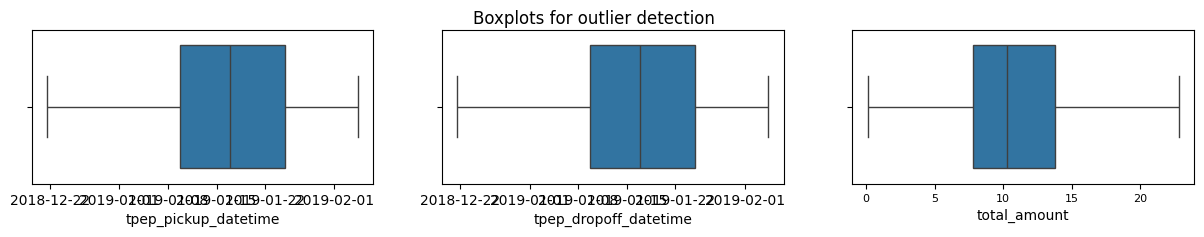

In [255]:
# Making sure that no outliers remained in total_amount column
outlier_detection_boxplot(df2['tpep_pickup_datetime'], df2['tpep_dropoff_datetime'], df2['total_amount'])

In [258]:
df2.shape

(6587749, 10)

## Checking for NULL values

In [259]:
df2.isna().sum()

VendorID                  0
tpep_pickup_datetime      0
tpep_dropoff_datetime     0
passenger_count          80
trip_distance             0
RatecodeID               80
PULocationID              0
DOLocationID              0
payment_type              0
total_amount              0
dtype: int64

## Checking for duplicates

In [260]:
df2.duplicated().sum()

0